## Imports

In [1]:
# pip install --upgrade scikit-learn

In [2]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.4.1
Sklearn  1.0.2


## Get the dataset
- **CLOUD = True**: Download dataset from Kaggle. Necesary for cloud enviroments like COLAB. **Specify your [kaggle credentials](https://www.kaggle.com/docs/api)**.
- **CLOUD = False**: Get the dataset from your local machine. **Specify the data path**.

In [3]:
DATA_PATH = "../../Datasets/Tabular/titanic/"

## Load data

In [4]:
df      = pd.read_csv("train.csv", index_col='PassengerId')
df_test = pd.read_csv("test.csv",  index_col='PassengerId')

print("Train DataFrame:", df.shape)
print("Test DataFrame: ", df_test.shape)

Train DataFrame: (891, 11)
Test DataFrame:  (418, 10)


## Check missings

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [7]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='count'>

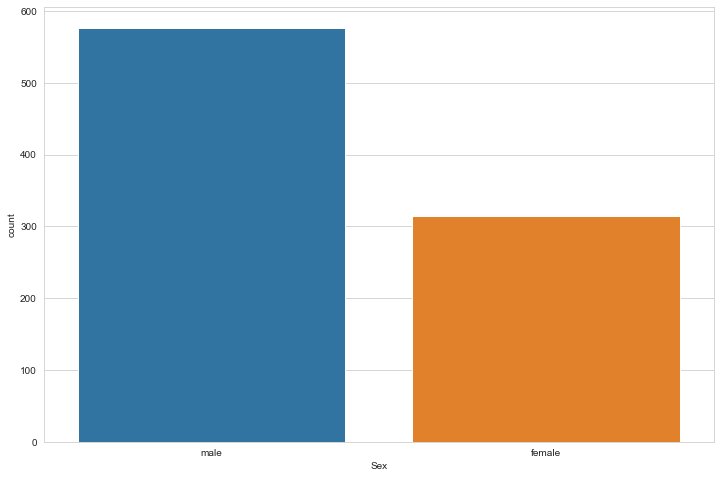

In [8]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

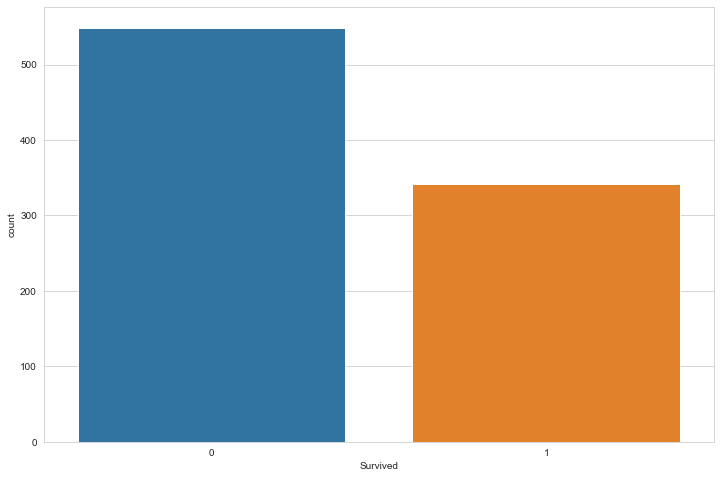

In [9]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

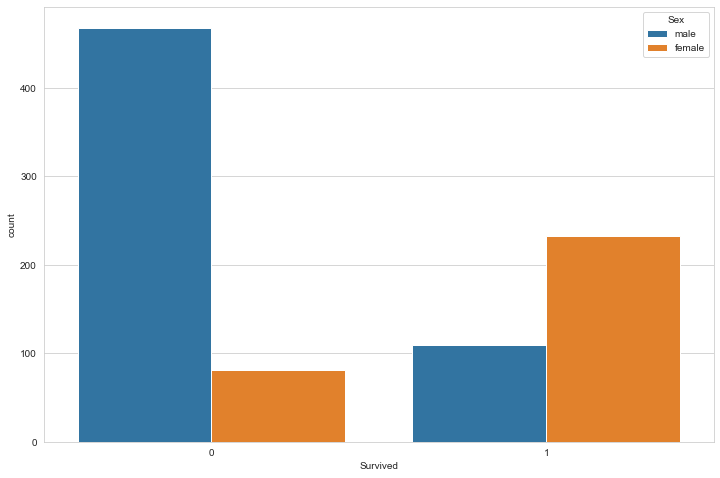

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='Survived', hue='Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

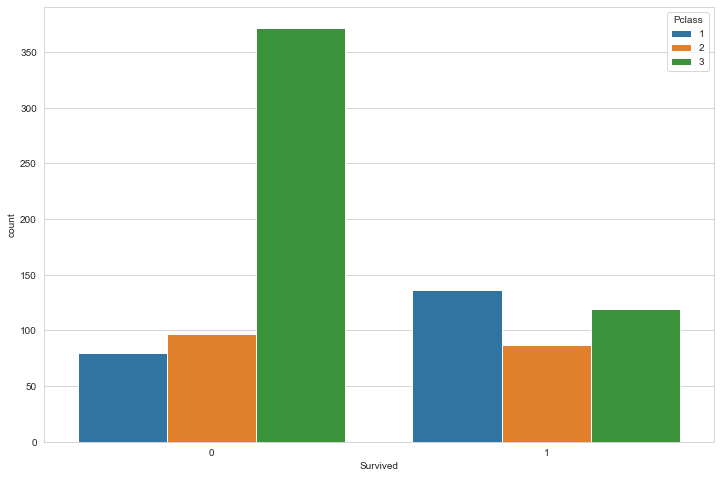

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x='Survived', hue='Pclass', data=df)

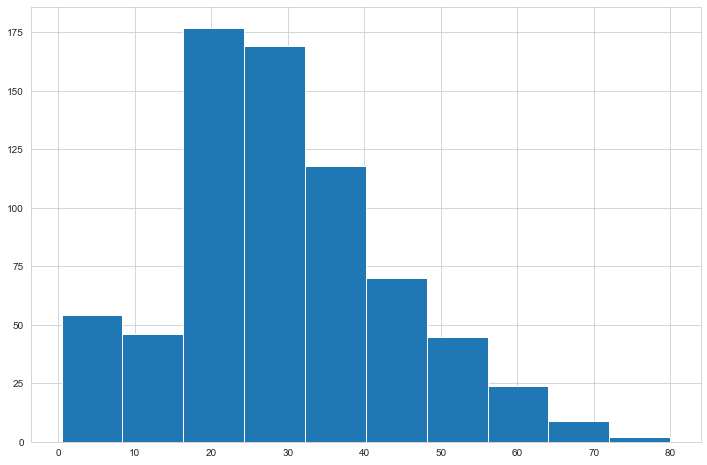

In [12]:
plt.figure(figsize=(12,8))
plt.hist(df['Age'])
plt.show()

<AxesSubplot:ylabel='PassengerId'>

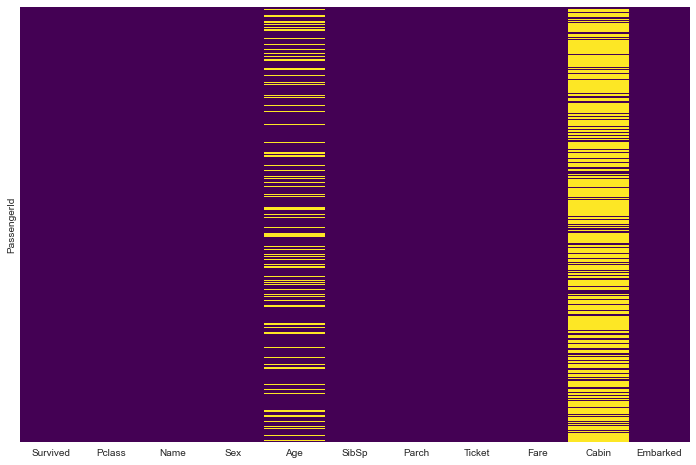

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

# Exercise 1 (2pts):
Extract the title (Mr, Mrs, ... ) from the "Name" column.

Tips:
- split(',')[1] to get the 2nd part, and remove the surnamename
- split('.')[0] to get the 1str part, and remove the name

In [14]:
# CODE HERE get_Title_from_Name funtion
# Create this function using lambda (not def)

get_Title_from_Name = lambda x : x.split(',')[1].split('.')[0].strip()
df['Title'] = df['Name'].apply(get_Title_from_Name)
df_test['Title'] = df_test['Name'].apply(get_Title_from_Name)



In [15]:
assert df['Title'].values[0] == "Mr"
assert df['Title'].values[1] == "Mrs"
assert df['Title'].values[2] == "Miss"

assert df_test['Title'].values[0] == "Mr"
assert df_test['Title'].values[1] == "Mrs"
assert df_test['Title'].values[414] == "Dona"

# Exercise 2 (1pts):
Apply the title_dictionary to get a better information about the title. You have to overwrite the Title variable.

In [16]:
title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [17]:
# Use map to apply the prevous dict

# df["Title"] =  
# df_test["Title"] =

df["Title"] = df['Title'].map(title_dictionary)
df_test["Title"] = df_test["Title"].map(title_dictionary)

print(df['Title'].values[886])
print(df_test['Title'].values[417])

Officer
Master


In [18]:
assert df['Title'].values[886] == "Officer"
assert df_test['Title'].values[417] == "Master"

# Exercise OPTINAL (0pts):
Try to extract some information from the feature **Ticket**. Search on Internet if that colum has some kind of information.

In [19]:
print(len(df.Ticket))
print(df.Ticket.nunique())

891
681


# Exercise OPTIONAL (0pts):
Try to extract some information from the feature **Cabin**. Search on Internet if that colum has some kind of information.

In [20]:
print(df.Cabin.isnull().sum()/len(df.Cabin))
print(df_test.Cabin.isnull().sum()/len(df_test.Cabin))

0.7710437710437711
0.7822966507177034


# Preprocessing
For X data, notice that...
- We drop Survived because is the target variable
- We drop Name because we have extracted the Title: Mr, Mrs, ...
- We drop Ticket because it has no information -> see df.Ticket.nunique()
- We drop Cabin because it has a lot of missings (77% are missings)

Then, we identify **numerical** variables and **categorical** variables,

In [21]:
x = df.drop(columns=["Survived", 'Name', 'Ticket', 'Cabin']) # X DATA (WILL BE TRAIN+VALID DATA)
y = df["Survived"] # 0 = No, 1 = Yes

x_test = df_test.drop(columns=['Name', 'Ticket', 'Cabin']) # # X_TEST DATA (NEW DATA)

In [22]:
cat_vars  = ['Sex', 'Embarked', 'Title']         # x.select_dtypes(include=[object]).columns.values.tolist()
num_vars  = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age'] # x.select_dtypes(exclude=[object]).columns.values.tolist()

print("\nNumerical features:\n", num_vars)
print("\nCategorical features:\n", cat_vars)


Numerical features:
 ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age']

Categorical features:
 ['Sex', 'Embarked', 'Title']


# Exercise 3 (2pts):
Create a **ColumnTransformer for Tree Models**. You need to create 2 pipelines (one for numerical and other for categories). Remember:
- Categorical pipeline: Some SimpleImputer -> Some Encoder
- Numerical pipeline: Some SimpleImputer -> NO Encoder

In [23]:
"""
num_preprocessing = pipeline.Pipeline(steps=[
  # Some SimpleImputer here
])

cat_preporcessing = pipeline.Pipeline(steps=[
  # Some SimpleImputer here
  # Some Encoder here. Remember to handle_unknown
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_preprocessing, num_vars),
    ('cat', cat_preporcessing, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_prepro
"""

### BEGIN SOLUTION
from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import OneHotEncoder
num_preprocessing = pipeline.Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])
cat_preporcessing = pipeline.Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('ohe', OneHotEncoder(handle_unknown='ignore'))])
tree_prepro = compose.ColumnTransformer(transformers=[('num', num_preprocessing, num_vars),('cat', cat_preporcessing, cat_vars)], remainder='drop')


In [24]:
assert type(tree_prepro)      is compose._column_transformer.ColumnTransformer
assert type(num_preprocessing) is pipeline.Pipeline
assert type(cat_preporcessing) is pipeline.Pipeline
assert len(num_preprocessing) == 1
assert len(cat_preporcessing) == 2

# Exercise 4 (1pts):
1. Complete the diccionary with some Tree Models.
2. Then we put each model in a Pipeline where:
   - first is the prepocessing with the column Transformer
   - Then is the Tree model
3. Display the fullpipeline of the LGBMClassifier

In [25]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [26]:
"""
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":
  "Random Forest":
  "AdaBoost":
  "Skl GBM":
  "Skl HistGBM":
  "XGBoost":
  "LightGBM":
  "CatBoost":
tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
tree_classifiers["LightGBM"]
"""


tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees": ExtraTreesClassifier(),
  "Random Forest": RandomForestClassifier(),
  "AdaBoost": AdaBoostClassifier(),
  "Skl GBM": GradientBoostingClassifier(),
  "Skl HistGBM":HistGradientBoostingClassifier(),
  "XGBoost": XGBClassifier(),
  "LightGBM": LGBMClassifier(),
  "CatBoost": CatBoostClassifier()}
tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
tree_classifiers["LightGBM"]




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', 'SibSp', 'Parch',
                                                   'Fare', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('lgbmclassifier', LGBMClassifier())])

In [27]:
for pipe in tree_classifiers.values():
    assert type(pipe) is pipeline.Pipeline

# Exercise 5 (3pts):
Define a simple split validation strategy with:
- 80% for train
- 20% for validation
- With stratification
- random_state=0

And train all the models in a for loop

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state=0, stratify=y)


results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in tree_classifiers.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    
    model.fit(X_train,y_train)
    # GET PREDICTIONS USING x_val
    pred =model.predict(X_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              


### BEGIN SOLUTION




results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\1783986546.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\1783986546.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\1783986546.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\1783986546.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    

[20:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\1783986546.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\1783986546.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


Learning rate set to 0.008911
0:	learn: 0.6873508	total: 133ms	remaining: 2m 12s
1:	learn: 0.6822636	total: 135ms	remaining: 1m 7s
2:	learn: 0.6768473	total: 137ms	remaining: 45.4s
3:	learn: 0.6705171	total: 139ms	remaining: 34.5s
4:	learn: 0.6655563	total: 140ms	remaining: 27.9s
5:	learn: 0.6602959	total: 142ms	remaining: 23.5s
6:	learn: 0.6540143	total: 144ms	remaining: 20.4s
7:	learn: 0.6492256	total: 146ms	remaining: 18.1s
8:	learn: 0.6433167	total: 147ms	remaining: 16.2s
9:	learn: 0.6382974	total: 149ms	remaining: 14.8s
10:	learn: 0.6341241	total: 152ms	remaining: 13.6s
11:	learn: 0.6292823	total: 153ms	remaining: 12.6s
12:	learn: 0.6244913	total: 155ms	remaining: 11.8s
13:	learn: 0.6188450	total: 156ms	remaining: 11s
14:	learn: 0.6147746	total: 158ms	remaining: 10.4s
15:	learn: 0.6101718	total: 160ms	remaining: 9.84s
16:	learn: 0.6056393	total: 162ms	remaining: 9.36s
17:	learn: 0.6004836	total: 164ms	remaining: 8.93s
18:	learn: 0.5971043	total: 166ms	remaining: 8.56s
19:	learn: 0

C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\1783986546.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


,Model,Accuracy,Bal Acc.,Time
1,Skl GBM,83.798883,81.416337,0.151250
2,Skl HistGBM,83.240223,80.961792,0.837626
3,XGBoost,82.681564,80.237154,1.259437
4,LightGBM,82.122905,79.242424,0.160916
5,CatBoost,81.005587,78.603426,2.523847
6,Random Forest,78.770950,75.974967,0.235648
7,AdaBoost,78.770950,76.515152,0.107780
8,Decision Tree,78.212291,76.330698,0.018704
9,Extra Trees,76.536313,74.156785,0.187747


In [29]:
assert results_ord["Accuracy"].min() > 75
assert results_ord["Bal Acc."].min() > 73
assert len(results_ord) == 9

# Exercise 6 (3pts):
Define a 10 Fold cross validation strategy with:
- With stratification
- shuffle=True
- random_state=0

And train all the models in a for loop.

Tip you can use **[cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)** for both training and predict with 

In [30]:

from sklearn.model_selection import StratifiedKFold, cross_val_predict
skf =StratifiedKFold(n_splits=10,shuffle=True, random_state=0,)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in tree_classifiers.items():
    start_time = time.time()
        
    # TRAIN AND GET PREDICTIONS USING cross_val_predict() and x,y
    pred = cross_val_predict(model, x, y, cv=skf)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              



results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\2361769011.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\2361769011.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\2361769011.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\2361769011.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    

[20:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Abubakr\Anaconda3\envs\ai\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\2361769011.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


[20:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\2361769011.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


Learning rate set to 0.009371
0:	learn: 0.6867291	total: 2ms	remaining: 2s
1:	learn: 0.6817678	total: 3.79ms	remaining: 1.89s
2:	learn: 0.6763422	total: 5.84ms	remaining: 1.94s
3:	learn: 0.6701533	total: 7.84ms	remaining: 1.95s
4:	learn: 0.6646650	total: 9.7ms	remaining: 1.93s
5:	learn: 0.6593213	total: 11.7ms	remaining: 1.93s
6:	learn: 0.6530416	total: 13.4ms	remaining: 1.91s
7:	learn: 0.6483903	total: 15.3ms	remaining: 1.9s
8:	learn: 0.6426914	total: 17.2ms	remaining: 1.89s
9:	learn: 0.6375581	total: 18.7ms	remaining: 1.85s
10:	learn: 0.6327491	total: 20.5ms	remaining: 1.84s
11:	learn: 0.6276529	total: 22.3ms	remaining: 1.83s
12:	learn: 0.6231467	total: 24ms	remaining: 1.82s
13:	learn: 0.6186971	total: 25.7ms	remaining: 1.81s
14:	learn: 0.6144953	total: 27.3ms	remaining: 1.79s
15:	learn: 0.6106289	total: 29ms	remaining: 1.78s
16:	learn: 0.6065750	total: 30.7ms	remaining: 1.77s
17:	learn: 0.6014274	total: 32.4ms	remaining: 1.77s
18:	learn: 0.5981040	total: 34.2ms	remaining: 1.77s
19:	

C:\Users\Abubakr\AppData\Local\Temp\ipykernel_556\2361769011.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


,Model,Accuracy,Bal Acc.,Time
1,Skl GBM,83.613917,81.466302,1.498884
2,CatBoost,83.501684,81.320104,20.621558
3,Skl HistGBM,83.277217,81.303327,10.832000
4,LightGBM,82.603816,80.867127,1.521517
5,XGBoost,82.042649,80.411753,2.037609
6,Random Forest,81.705948,80.028281,2.147362
7,AdaBoost,81.144781,80.124149,1.111547
8,Extra Trees,80.583614,79.172658,1.997275
9,Decision Tree,79.349046,78.115713,0.210291


In [31]:
assert results_ord["Accuracy"].min() > 75
assert results_ord["Bal Acc."].min() > 75
assert len(results_ord) == 9

# Exercise 7.1
Train with all data the best model

In [32]:
# best_model = tree_classifiers["SELECT MY BEST MODEL HERE"]

# Fit best model with all data

best_model = tree_classifiers['Skl GBM']
best_model.fit(x,y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', 'SibSp', 'Parch',
                                                   'Fare', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

# Exercise 7.2 (2pts)
With your best model, generate the predicitions for test data (x_test)

In [33]:
# test_pred = # Get the predictions for x_test
test_pred = best_model.predict(x_test)
#test_pred

In [34]:
assert len(test_pred) == 418
assert np.unique(test_pred).tolist() == [0,1]

# Exercise 7.3

Submit to kaggle.

- You can use the kaggle command line app. Check https://github.com/Kaggle/kaggle-api

In [35]:
sub = pd.DataFrame(test_pred, index=x_test.index, columns=["Survived"])
sub.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [36]:
sub.to_csv("sub.csv")

In [37]:
!kaggle competitions submit -c titanic -f sub.csv -m "My submission message"

Traceback (most recent call last):
  File "C:\Users\Abubakr\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Abubakr\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Abubakr\Anaconda3\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\Abubakr\Anaconda3\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\Abubakr\Anaconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\Abubakr\.kaggle. Or use the environment method.


In [38]:
sub1 = pd.DataFrame({
    'Survived': test_pred,
    'sex': x_test['Sex']
    })
sub1

,Survived,sex
PassengerId,,
892,0,male
893,0,female
894,0,male
895,0,male
896,0,female
...,...,...
1305,0,male
1306,1,female
1307,0,male
